## Implementation of Logistic Regression (one variable) from scratch

### Definitions:
*   $x$: Independent variable
*   $y$: Dependent variable (binary, e.g., yes/no)
*   $\mathbf{w}$: Weight vector including bias, $\mathbf{w} = \begin{bmatrix} b \\ w_1 \end{bmatrix}$

### Model:
The predicted output $\hat{y}$ is calculated using the sigmoid function:
$$\hat{y} = \sigma(\mathbf{x} \cdot \mathbf{w})$$
where $\mathbf{x} = \begin{bmatrix} 1 \\ x \end{bmatrix}$ is the augmented input vector.


Sigmoid function:
$$\sigma(xw) = \frac{1}{1 + \exp(-xw)}$$

Loss function (Binary Cross-Entropy):
$$Loss = -\frac{1}{m}\sum_{i=1}^{m}[y_i \ln(\hat{y}_i) + (1-y_i)\ln(1-\hat{y}_i)]$$

Gradient of the Loss Function:
$$Gradient = -\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)x_i$$

Weight Update Rule:
$$w := w - L \cdot Gradient$$

**CODE:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[1],[2],[3],[4],[5],[6],[7]])
y = np.array([[0],[0],[0],[1],[1],[1],[1]])
x_ = np.insert(x,0,1,1)
m = len(x_)

w = np.array([[0.],[0.]])

In [3]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

def gradient(x_,y,w):
    y_hat = sigmoid(x_@w)
    return -(1/m)*(x_.T@(y-y_hat))

In [4]:
epoch = 2000
L = 0.1

for j in range(epoch+1):
    total_loss = 0
    w -= L * gradient(x_, y, w)
    y_hat = sigmoid(x_@w)
    for i in range(m):
        Loss = -(1.0 / m) * (y[i] * np.log(y_hat[i]) + (1 - y[i]) * np.log(1 - y_hat[i]))
        total_loss += Loss
    if j%100 == 0 or j==1000:
        print(f"Loss at {j} epoch : ",total_loss)

Loss at 0 epoch :  [0.59490244]
Loss at 100 epoch :  [0.37886773]
Loss at 200 epoch :  [0.29323031]
Loss at 300 epoch :  [0.24504463]
Loss at 400 epoch :  [0.21418596]
Loss at 500 epoch :  [0.19255977]
Loss at 600 epoch :  [0.17641426]
Loss at 700 epoch :  [0.16379448]
Loss at 800 epoch :  [0.15358493]
Loss at 900 epoch :  [0.14510255]
Loss at 1000 epoch :  [0.13790499]
Loss at 1100 epoch :  [0.13169257]
Loss at 1200 epoch :  [0.12625461]
Loss at 1300 epoch :  [0.12143836]
Loss at 1400 epoch :  [0.11713011]
Loss at 1500 epoch :  [0.11324334]
Loss at 1600 epoch :  [0.10971089]
Loss at 1700 epoch :  [0.10647979]
Loss at 1800 epoch :  [0.10350758]
Loss at 1900 epoch :  [0.10075983]
Loss at 2000 epoch :  [0.09820826]


In [7]:
print("\nW:\n",w)
y_hat = sigmoid(x_@w)
print("\nPredicted: \n",y_hat)

x_new = np.array([[1,3.4]])
y_predicted = sigmoid(x_new@w)
print(f"\nPrediction for {x_new[0][1]}: {y_predicted[0][0]*100}% pass")


W:
 [[-7.29224938]
 [ 2.14912007]]

Predicted: 
 [[0.00580549]
 [0.04769725]
 [0.30050607]
 [0.78654617]
 [0.96933092]
 [0.99632482]
 [0.99957013]]

Prediction for 3.4: 50.368964549586245% pass


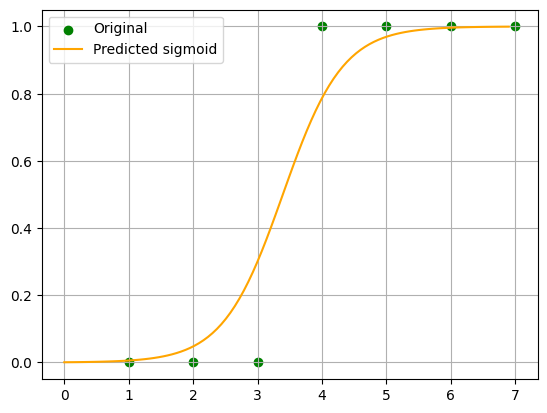

In [8]:
# plotting
xi = np.linspace(0,6.9,100)
xi.resize(100,1)
xi_ = np.insert(xi,0,1,1)
plt.scatter(x,y,marker='o',label = 'Original',color='Green')
plt.plot(xi,sigmoid(xi_@w),color='Orange',label='Predicted sigmoid')
plt.grid()
plt.legend()
plt.show()